# Valószínűségszámítás pythonnal

A következőkben arra láthatunk példákat, hogy akár pszeudó-véleltlenszám generálásával is hasonló eredményre juthatunk, mint azt a valószínűség számítás során megtanulhattuk.

Többek között mintapéldákat oldunk meg Harmati István vizsgái közül:

[www.sze.hu/~harmati/valszam/vizsga/valszamBSC_mintavizsga.pdf](http://www.sze.hu/~harmati/valszam/vizsga/valszamBSC_mintavizsga.pdf)

### Pénzérme dobása

Dobjunk fel (virtuálisan) egy pénzérmét - mondjuk 500-szor - és számoljuk meg, mekkora a fejek aránya. (Értelemszerűen 0,5-hez kell korrelálnia, de nézzük meg ezt egy plot segítségével is)


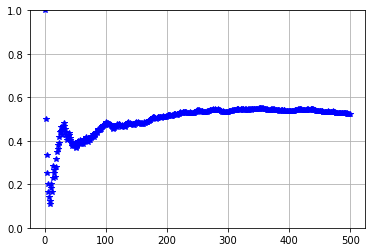

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# hányszor ismételjük?
db = 500
# dobások db számosságú array, 0 vagy 1 (diszkrét, egyenletes eloszlás)
dobasok = np.random.randint(2, size=db)
for i in range(1, db):
    plt.plot(i, np.sum(dobasok[0:(i+1)]) / i, "b*")
plt.grid(True)
plt.ylim(0, 1)
plt.show()

### Példa

Példa az előbb említettek közül:
[www.sze.hu/~harmati/valszam/vizsga/valszamBSC_mintavizsga.pdf](http://www.sze.hu/~harmati/valszam/vizsga/valszamBSC_mintavizsga.pdf)

Egy dobozban 20 fehér golyó van. Egy szabályos dobókockával dobunk, majd a következőt tesszük: 
 - ha a dobott szám 1, 2 vagy 3, akkor tíz golyót cserélünk ki pirosra; 
 - ha a dobott szám 4 vagy 5, akkor hat golyót cserélünk pirosra; 
 - ha a dobott szám 6, akkor tizenkét golyót cserélünk pirosra. 

Ezután véletlenszerűen húzunk egy golyót a dobozból.
 - a) Mi a valószínűsége annak, hogy pirosat húzunk? (0,45) 
 - b) Feltéve, hogy pirosat húztunk, mi a valószínűsége, hogy hatost dobtunk? (2/9 ≈ 0,2222)

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# hányszor ismételjük?
db = 100000

# dobások db számosságú array, 1-6 között (diszkrét, egyenletes eloszlás)
dobasok = np.random.randint(6, size=db) + 1

eredmeny_a = 0
eredmeny_b = 0
# darabszám, feltéve, hogy pirosat húztunk 
db_piros = 0

for d in dobasok:
    # False = Fehér
    # True = Piros
    golyok = np.full((20), False, dtype=bool)
    if d == 1 or d == 2 or d == 3:
        golyok[0:10] = True
    elif d == 4 or d == 5:
        golyok[0:6] = True
    else:
        golyok[0:12] = True
    huzas = golyok[np.random.randint(20)]   
    eredmeny_a += huzas
    # Ha pirosat húztunk
    if huzas == True:
        db_piros += 1
        if d == 6:
            eredmeny_b += 1

print("A válasz: %.4f (%d dobásnál, minél nagyobb szám, annál jobban közelíti a 0,45-t) " % (eredmeny_a / db, db))
print("B válasz: %.4f (%d dobásnál, minél nagyobb szám, annál jobban közelíti a 0,2222-t) " % (eredmeny_b / db_piros, db))

A válasz: 0.4480 (100000 dobásnál, minél nagyobb szám, annál jobban közelíti a 0,45-t) 
B válasz: 0.2225 (100000 dobásnál, minél nagyobb szám, annál jobban közelíti a 0,2222-t) 


### _Used sources_ / Felhasznált források
- [Shannon Turner: Python lessons repository](https://github.com/shannonturner/python-lessons) MIT license (c) Shannon Turner 2013-2014
- [Siki Zoltán: Python mogyoróhéjban](http://www.agt.bme.hu/gis/python/python_oktato.pdf) GNU FDL license (c) Siki Zoltán
- [BME AUT](https://github.com/bmeaut) MIT License Copyright (c) BME AUT 2016-2018